# Car Price Predcition With Machine Learning
The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

# Importing Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the csv file
df = pd.read_csv("C:/Users/Devi/Downloads/car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Analyzing The Dataset

In [4]:
# check Missing value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
# Getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Getting the shape of the dataset
df.shape

(301, 9)

In [8]:
# Descriptive statistical analysis of data
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
# Getting all the unique car names
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [12]:
# Checking the fuel types
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [14]:
# Checking the Selling_Price
df.Selling_Price.value_counts()

Selling_Price
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: count, Length: 156, dtype: int64

In [15]:
# Checking the Present_Price
df.Present_Price.value_counts()

Present_Price
9.40     14
13.60    13
5.70      8
1.47      7
0.51      6
         ..
36.23     1
18.54     1
7.27      1
15.04     1
12.50     1
Name: count, Length: 148, dtype: int64

In [16]:
# Checking the Driven_kms
df.Driven_kms.value_counts()

Driven_kms
45000    9
15000    9
40000    5
35000    5
50000    5
        ..
1400     1
1200     1
4100     1
21700    1
5464     1
Name: count, Length: 206, dtype: int64

In [17]:
#Checking the Selling_type
df.Selling_type.value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [18]:
#Checking the Transmission
df.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [19]:
#Checking the Owner
df.Owner.value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [21]:
df.corr(numeric_only=True)

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


In [23]:
df.cov(numeric_only=True)

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,8.361085,3.470617,-1.179364,-5.895887e+04,-0.130543
Selling_Price,3.470617,25.834973,38.609504,5.768966e+03,-0.111323
Present_Price,-1.179364,38.609504,74.694264,6.843250e+04,0.017266
Driven_kms,-58958.869767,5768.965732,68432.499616,1.512190e+09,860.101074
Owner,-0.130543,-0.111323,0.017266,8.601011e+02,0.061462


# Visualizing The Dataset

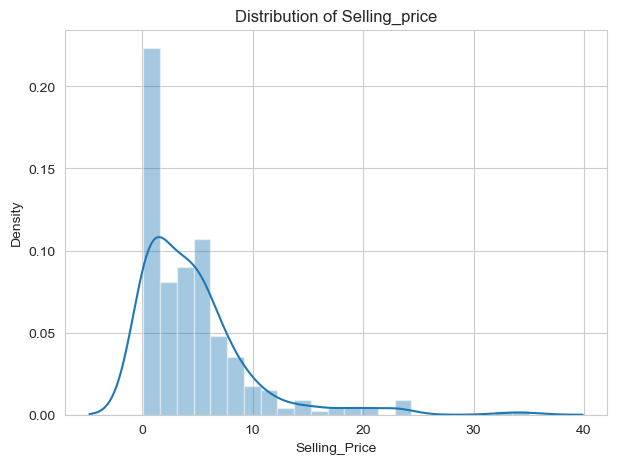

In [43]:
# distplot of the Selling_Price column
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
sns.distplot(df.Selling_Price)
plt.title(f'Distribution of Selling_price')
plt.show()

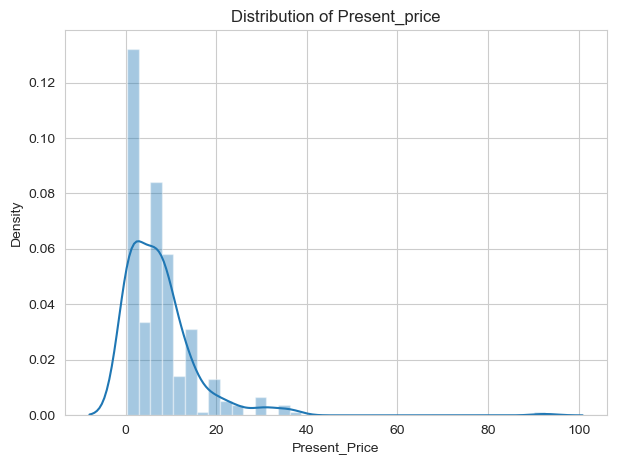

In [44]:
# distplot of the Present_Price column
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
sns.distplot(df.Present_Price)
plt.title(f'Distribution of Present_price')
plt.show()

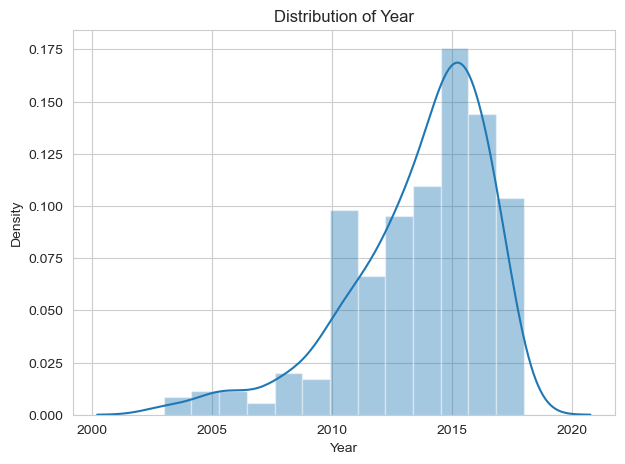

In [45]:
# distplot of the Year column
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
sns.distplot(df.Year)
plt.title(f'Distribution of Year')
plt.show()

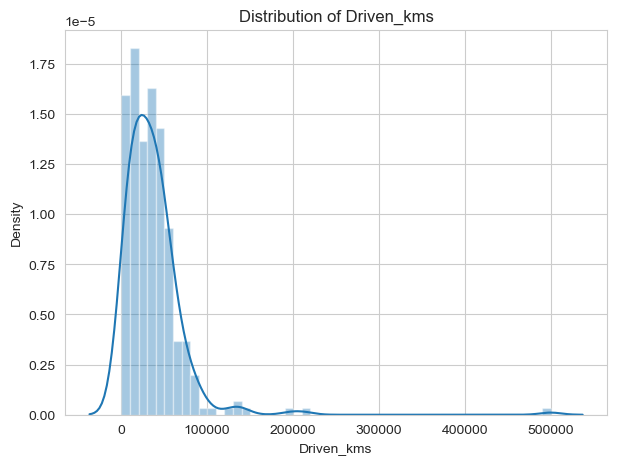

In [46]:
# distplot of the Driven_kms column
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
sns.distplot(df.Driven_kms)
plt.title(f'Distribution of Driven_kms')
plt.show()

<Figure size 300x300 with 0 Axes>

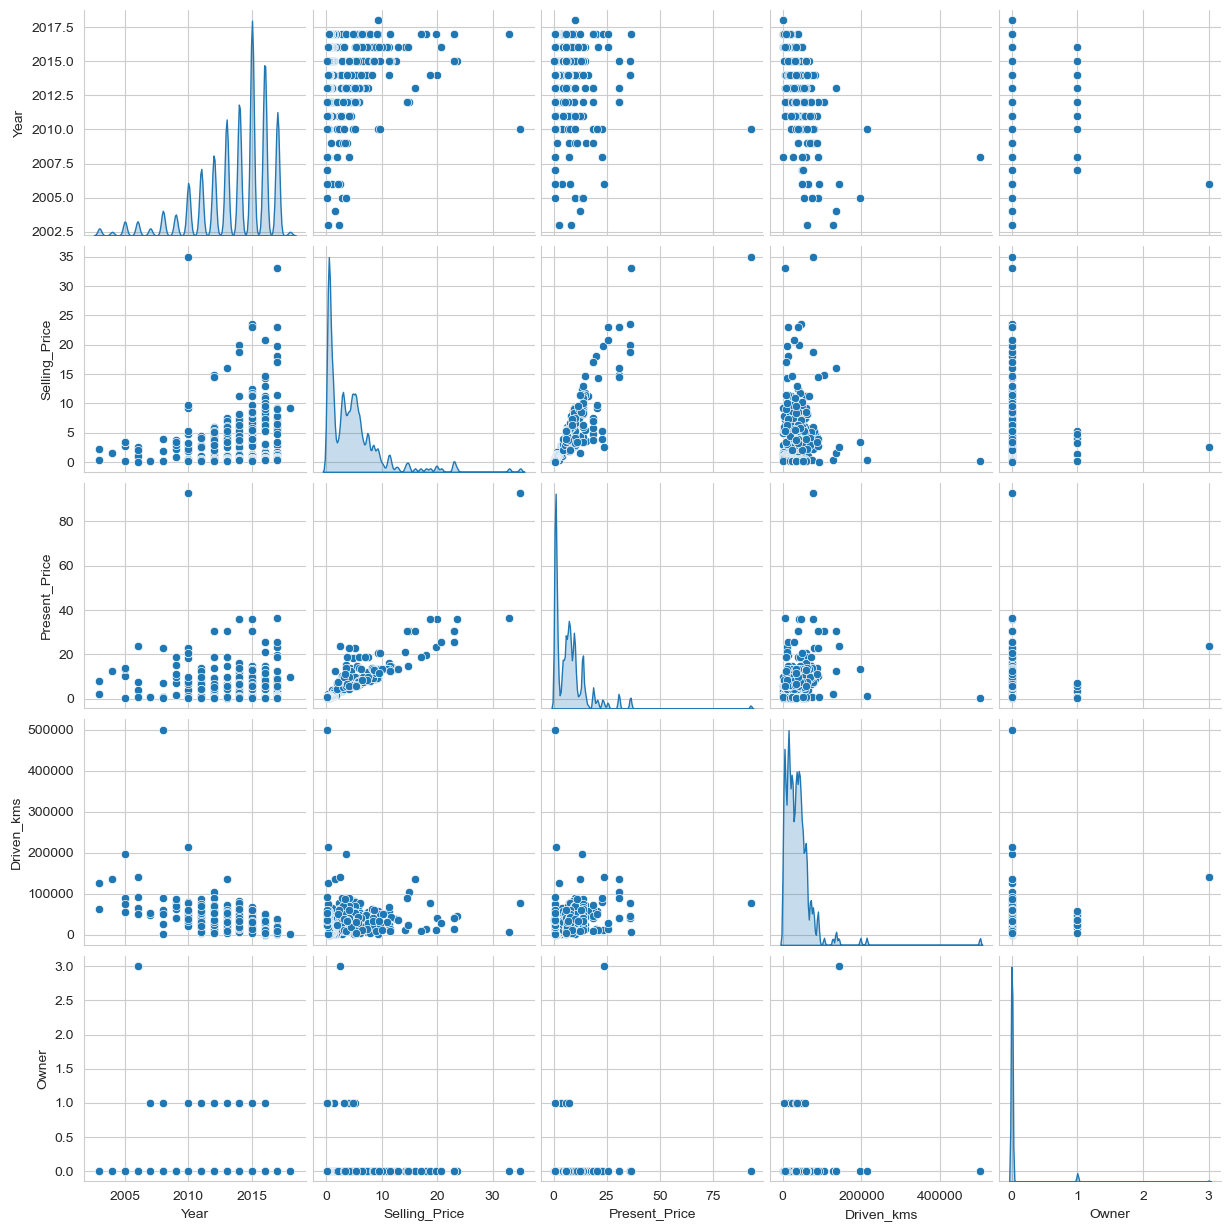

In [30]:
# A pairplot plot a pairwise relationships
plt.figure(figsize=(3,3))
sns.pairplot(df,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

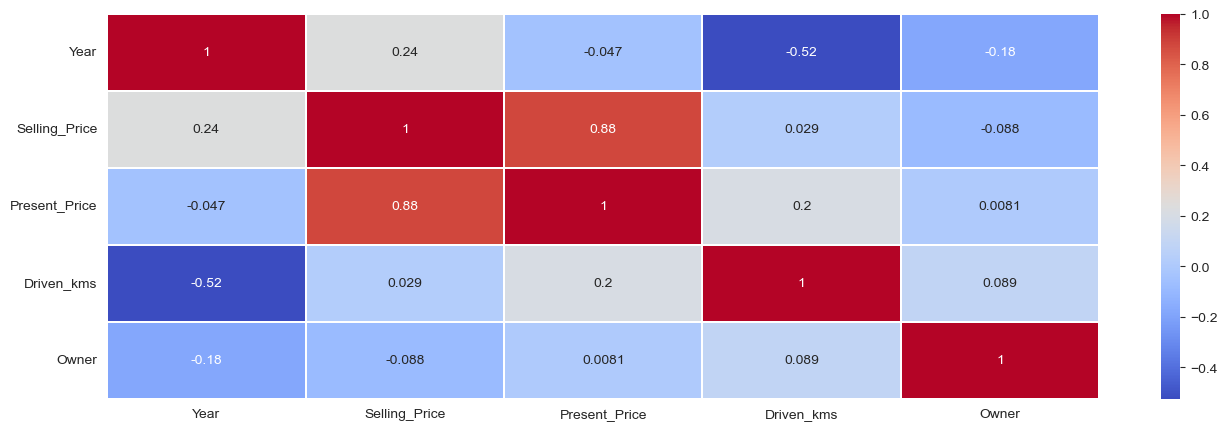

In [37]:
plt.figure(figsize = (16,5))
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',linewidths=.1)

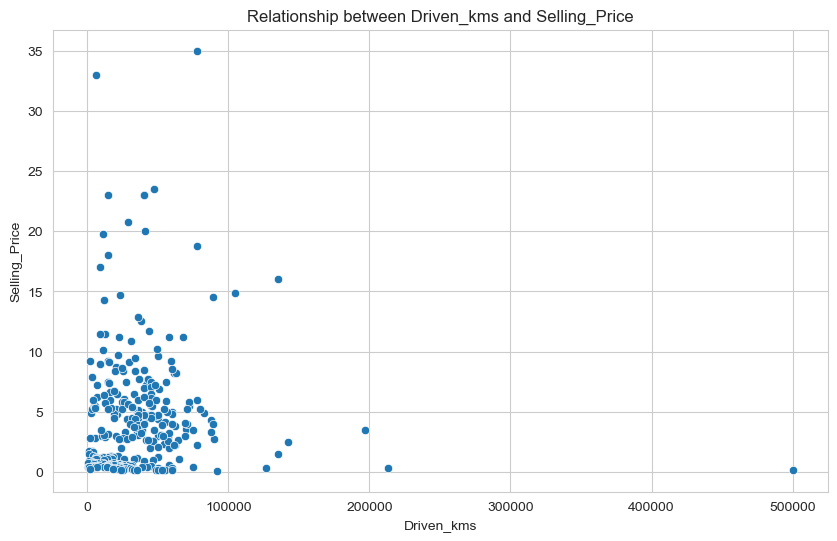

In [74]:
# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title('Relationship between Driven_kms and Selling_Price')
plt.show()

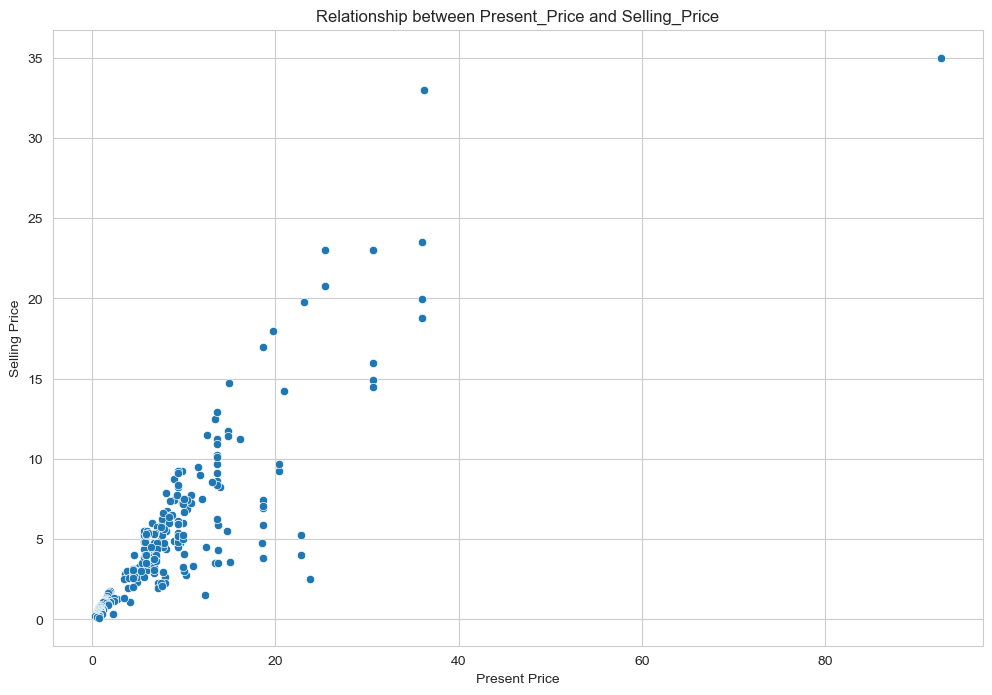

In [50]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Relationship between Present_Price and Selling_Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')

plt.show()

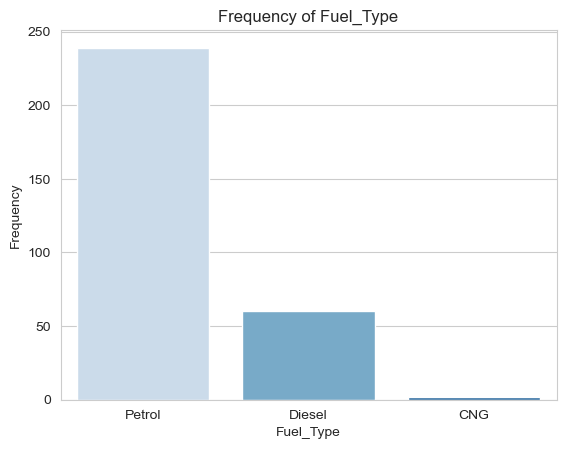

In [57]:
sns.countplot(x="Fuel_Type", data=df, palette="Blues")
plt.ylabel('Frequency')
plt.title(f'Frequency of Fuel_Type')
plt.show()

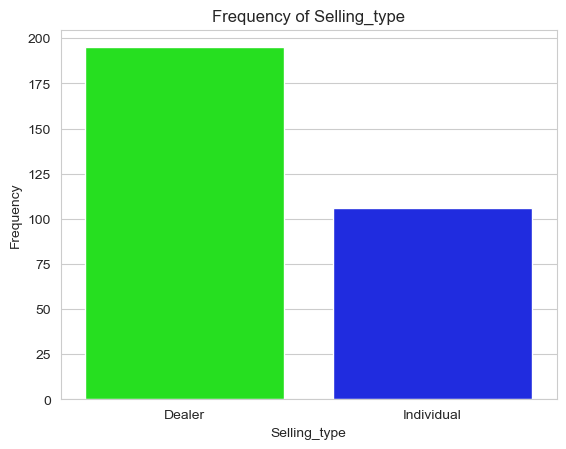

In [70]:
sns.countplot(x="Selling_type", data=df, palette="hsv")
plt.ylabel('Frequency')
plt.title(f'Frequency of Selling_type')
plt.show()

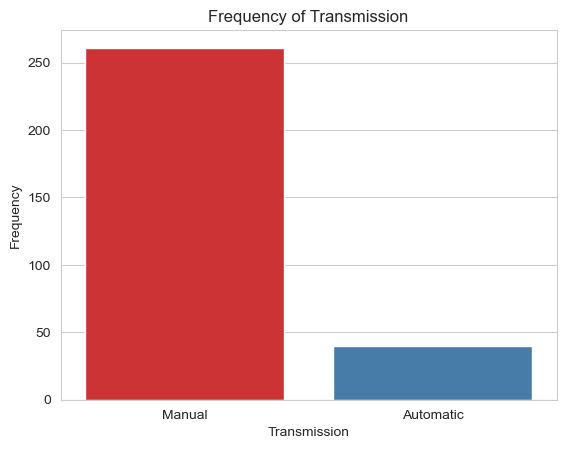

In [71]:
sns.countplot(x="Transmission", data=df,palette="Set1")
plt.ylabel('Frequency')
plt.title(f'Frequency of Transmission')
plt.show()

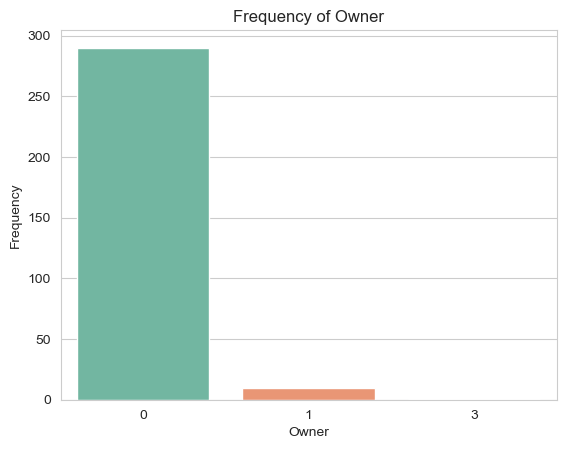

In [73]:
sns.countplot(x="Owner", data=df,palette="Set2")
plt.ylabel('Frequency')
plt.title(f'Frequency of Owner')
plt.show()

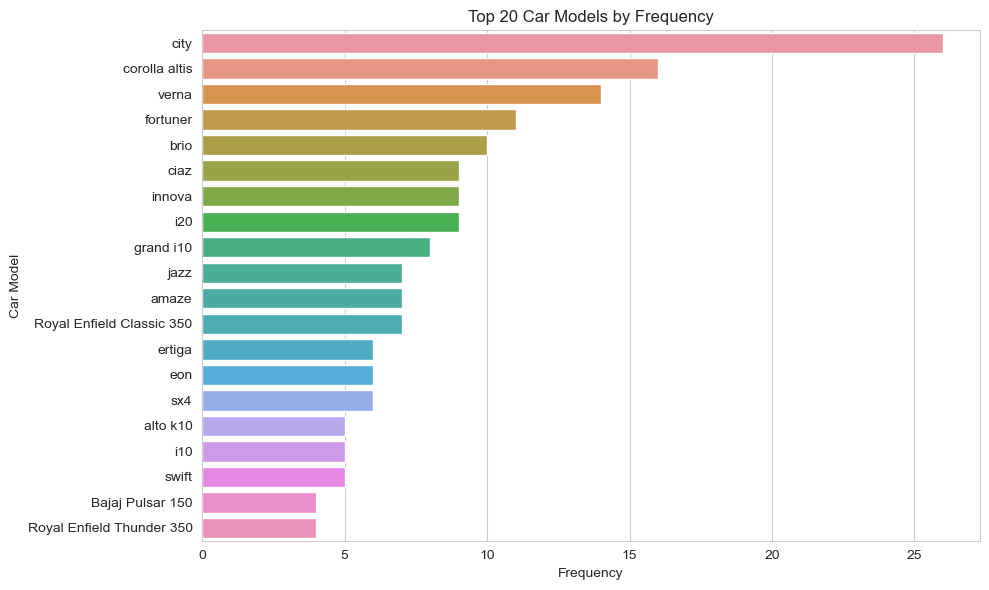

In [68]:
n = 20  # Number of top car models to plot
top_car_models = df['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

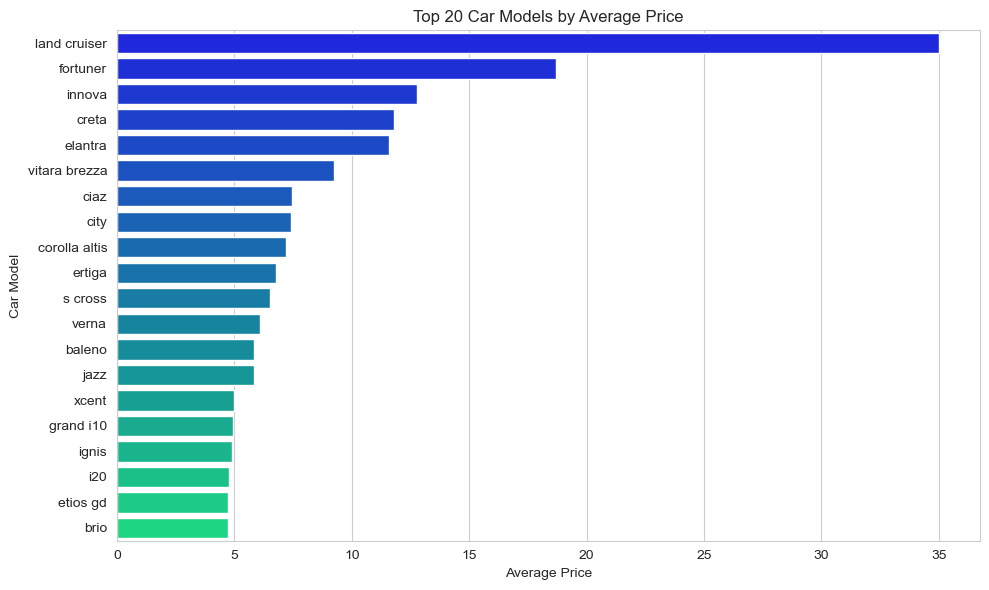

In [69]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index,palette='winter')
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

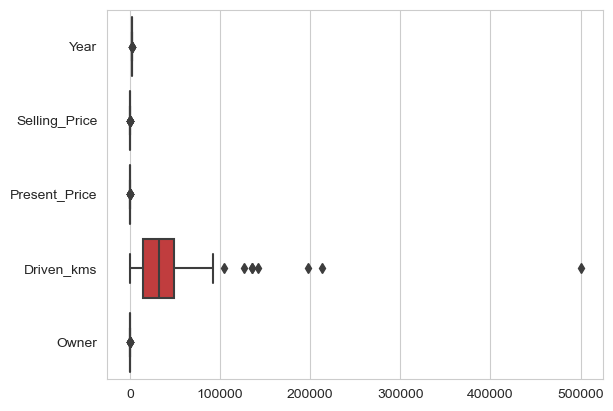

In [76]:
#Box plots
sns.boxplot(data=df, orient="h")
plt.show()

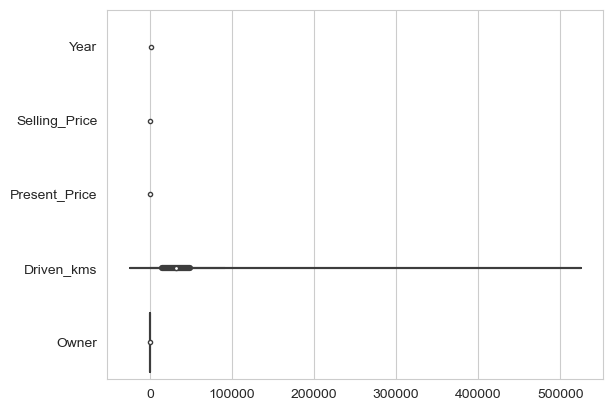

In [80]:
#violin plot
sns.violinplot(data=df, orient="h")
plt.show()

#  Prediction

In [81]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [83]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0
2,2017,9.85,6900,Petrol,Dealer,Manual,0
3,2011,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,Diesel,Dealer,Manual,0
297,2015,5.90,60000,Petrol,Dealer,Manual,0
298,2009,11.00,87934,Petrol,Dealer,Manual,0
299,2017,12.50,9000,Diesel,Dealer,Manual,0


In [85]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [98]:
# Split the data into training and testing sets
X=X.apply(pd.to_numeric,errors='coerce')
Y=Y.apply(pd.to_numeric,errors='coerce')
X.fillna(0,inplace=True)
Y.fillna(0,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64

# Linear Regression

In [99]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [100]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 4.125555394839589
R-squared: 0.8209051135122831


In [101]:
# Make predictions
new_car = [[2022, 20000, 0, 1, 1, 0, 0]]  # Example new car data
predicted_price = model.predict(new_car)
print('Predicted Selling Price:', predicted_price[0])

Predicted Selling Price: 10326.051865087082


In [105]:
from sklearn.linear_model import Lasso
model1 = Lasso()
model1.fit(X_train, y_train)

Lasso()

# Lasso()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [116]:
y_pred = model.predict(X_train)
y_pred

array([-2.30967011,  2.7443314 , -1.16954202,  4.89281317,  2.6026205 ,
       19.51645609, 17.17725596,  5.58922298,  0.07131063,  3.19309382,
        3.82104525,  5.88803179,  5.13137275,  2.41762772,  2.52780881,
        2.68623873,  9.03670831,  1.5494679 ,  8.41473336,  4.44733644,
        3.20765208,  3.9780414 , 14.19479027,  2.05814453,  2.11441386,
        1.54905677,  3.39214338,  2.03977729, 15.87111662,  2.15884562,
       -1.23393516, 10.1281858 ,  7.36678419,  4.11315959, -1.70435024,
        4.4887312 ,  6.7446838 ,  4.33510909, -2.5718096 ,  6.94698087,
       -0.24276047,  5.2470143 ,  3.98885545,  9.81222642,  2.08544407,
       12.6169091 ,  2.20715617,  0.24674222,  0.6517451 ,  5.79590216,
        2.24762402,  4.01074981,  0.7972928 , 14.91396934,  4.11196986,
       -0.24423052, 47.03095986,  8.82321561,  1.79754003,  4.38606232,
        8.81119228,  2.74627236,  1.89083458,  6.43439288,  6.58953488,
        1.38715476, -0.44069419,  5.74341322,  3.76775483, -0.45

# Actual vs Predicted Price Graph

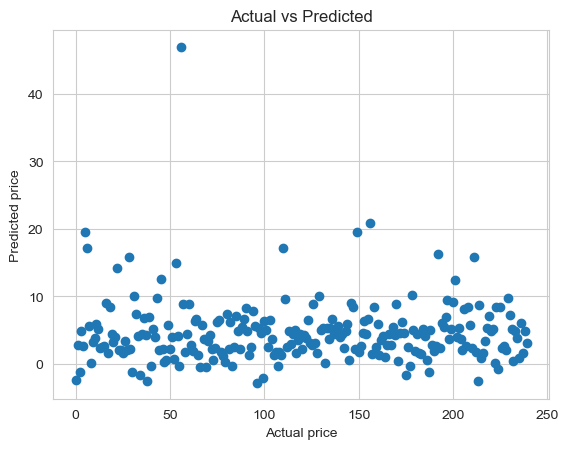

In [117]:
plt.scatter(np.arange(len(y_train)),y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title("Actual vs Predicted")
plt.show()

# Error Square

In [121]:
from sklearn import metrics
error_square = metrics.r2_score(y_train, y_pred)
print("Error square: ", error_square)

Error square:  0.8575523993094598


In [119]:
y_pred1 = model1.predict(X_train)
y_pred1

array([-0.3080275 ,  2.46867697, -0.43445807,  4.66636735,  2.43322028,
       19.10128835, 16.68380197,  5.43798494,  0.26084656,  3.31179774,
        4.06498364,  5.54978421,  4.87664436,  2.69560412,  2.22359406,
        2.40397434,  8.8469151 ,  1.39523182,  8.19138385,  4.34143852,
        3.55923513,  4.23820173, 13.65070651,  2.31949182,  1.99730215,
        1.80897755,  3.81940199,  1.66760067, 15.54097346,  2.08568784,
       -0.24825535,  9.95384624,  6.92409423,  3.81713804, -3.29091912,
        4.78340018,  6.73305362,  4.17852655, -1.55588298,  6.64992414,
        0.395209  ,  4.97200309,  4.38876891, 10.01977247,  2.50662333,
       12.22964042,  2.46168064,  0.66599859,  1.02062889,  5.52463702,
        2.0008569 ,  3.80457894,  0.99142914, 14.39253774,  3.89598907,
        0.23748805, 46.39387446,  8.38795088,  1.5191204 ,  4.81123512,
        8.30553392,  2.48198173,  1.82512306,  6.08509776,  6.93504028,
        1.47019889,  0.16417329,  5.46802768,  3.5678488 ,  0.09

# Error Square

In [122]:
error_square = metrics.r2_score(y_train, y_pred1)
print("Error square: ", error_square)

Error square:  0.8476678444782828


# Actual vs Predicted Price Graph

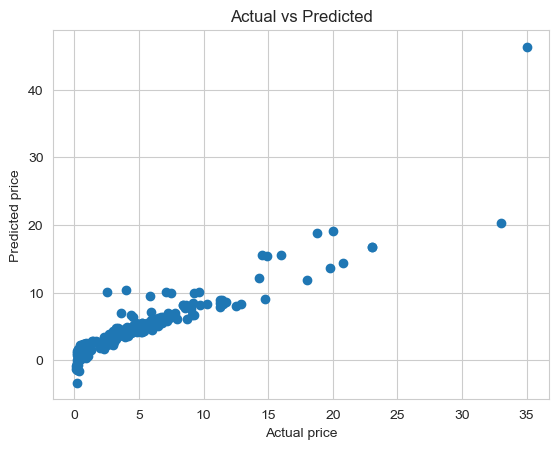

In [123]:
plt.scatter(y_train, y_pred1)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title("Actual vs Predicted")
plt.show()

# Conclusion
In this task, I took Car Price dataset and performed Linear Regression and Lasso Regression Algorithms to make model.

Many analyses of the dataset were performed.

Many visualizations of the dataset were created.

Finally, I plotted a graph for actual vs. predicted values